https://www.kaggle.com/kunstmord/exploring-the-songs
# Data Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('input/train.csv')
songs = pd.read_csv('input/songs.csv')
test = pd.read_csv('input/test.csv')

In [3]:
print('Statistics From the Dataset: ')
songs_in_train_and_test = np.intersect1d(train['song_id'].unique(), test['song_id'].unique())
print('Count of Unique Songs in Training Set: ',train['song_id'].nunique())
print('Count of Unique Songs in Testing Set: ',test['song_id'].nunique())
print('Songs that dont appear in Training Set: ',(test['song_id'].nunique() - songs_in_train_and_test.shape[0]))
print('Percentage: ',(test['song_id'].nunique() - songs_in_train_and_test.shape[0]) / test['song_id'].nunique())

print('Users Statistics: ')
users_in_train_and_test = np.intersect1d(train['msno'].unique(), test['msno'].unique())
print('Count of Users in Training Set: ',train['msno'].nunique())
print('Count of Users in Testing Set: ',test['msno'].nunique())
print('Users that dont appear in Training Set: ',(test['msno'].nunique() - users_in_train_and_test.shape[0]))
print('Percentage: ',(test['msno'].nunique() - users_in_train_and_test.shape[0]) / test['msno'].nunique())

train_merged = train.merge(songs[['song_id', 'artist_name', 'genre_ids','language']], on='song_id')
test_merged = test.merge(songs[['song_id', 'artist_name', 'genre_ids','language']], on='song_id')

print('Artists Statistics: ')
artists_in_train_and_test = np.intersect1d(train_merged['artist_name'].unique(),test_merged['artist_name'].unique())
print('Count of Artists in Training Set: ',train_merged['artist_name'].nunique())
print('Count of Artists in Testing Set: ', test_merged['artist_name'].nunique())
print('Artists that dont appear in Training Set: ',(test_merged['artist_name'].nunique() - artists_in_train_and_test.shape[0]))
print('Percentage: ',(test_merged['artist_name'].nunique() - artists_in_train_and_test.shape[0]) / test_merged['artist_name'].nunique())

print('Language Statistics: ')
langs_in_train_and_test = np.intersect1d(train_merged['language'].unique(),test_merged['language'].unique())
print('Number of Languages Present in Training Set: ',train_merged['language'].nunique())
print('Number of Languages Present in Testing Set: ', test_merged['language'].nunique())
print('Languages that dont appear in Training Set: ',(test_merged['language'].nunique() - langs_in_train_and_test.shape[0]))
print('Percentage: ',(test_merged['language'].nunique() - langs_in_train_and_test.shape[0]) / test_merged['language'].nunique())

print('Genre Statistics: ')
genres_in_train_and_test = np.intersect1d(train_merged['genre_ids'].apply(str).unique(),test_merged['genre_ids'].apply(str).unique())
print('Number of Genres Present in Training Set: ',train_merged['genre_ids'].nunique())
print('Number of Genres Present in Testing Set: ', test_merged['genre_ids'].nunique())
print('Genres that dont appear in Traning Set: ',(test_merged['genre_ids'].nunique() - genres_in_train_and_test.shape[0]))
print('Percentage: ',(test_merged['genre_ids'].nunique() - genres_in_train_and_test.shape[0]) / test_merged['genre_ids'].nunique())

Statistics From the Dataset: 
Count of Unique Songs in Training Set:  359966
Count of Unique Songs in Testing Set:  224753
Songs that dont appear in Training Set:  59873
Percentage:  0.2663946643648806
Users Statistics: 
Count of Users in Training Set:  30755
Count of Users in Testing Set:  25131
Users that dont appear in Training Set:  3648
Percentage:  0.14515936492777845
Artists Statistics: 
Count of Artists in Training Set:  40582
Count of Artists in Testing Set:  27563
Artists that dont appear in Training Set:  5790
Percentage:  0.21006421652214927
Language Statistics: 
Number of Languages Present in Training Set:  10
Number of Languages Present in Testing Set:  10
Languages that dont appear in Training Set:  0
Percentage:  0.0
Genre Statistics: 
Number of Genres Present in Training Set:  572
Number of Genres Present in Testing Set:  501
Genres that dont appear in Traning Set:  35
Percentage:  0.06986027944111776


In [4]:
listen_log = train[['msno','song_id','target']].merge(songs,on='song_id')
listen_log_groupby = listen_log[['song_id', 'target']].groupby(['song_id']).agg(['mean','count'])
listen_log_groupby.reset_index(inplace=True)
listen_log_groupby.columns = list(map(''.join, listen_log_groupby.columns.values))
listen_log_groupby.columns = ['song_id', 'repeat_play_chance', 'plays']

song_data = listen_log_groupby.merge(songs, on='song_id')
song_data['repeat_events'] = song_data['repeat_play_chance'] * song_data['plays']

In [5]:
song_data.head()

,song_id,repeat_play_chance,plays,song_length,genre_ids,artist_name,composer,lyricist,language,repeat_events
0,+++2AEoM0d8iZTdbnAjUm35bnGKGMXdZJSv4rrWK6JQ=,0.0,1,223921,921,รวมศิลปิน,Chackkrit Muckkanaso,Tadakorn; Narongvit Techatanawat,45.0,0.0
1,++/ACCkEN/+VtgrJxEqeRgRmV4y8pcarDJ9T/yRAi1E=,0.0,2,271302,465,Variété Française,NaN,NaN,52.0,0.0
2,++/lJNswCU+za2pYB0cWIbGL5UzWIKtfweX20+GImZA=,0.0,3,221413,786|947,愛的音樂盒,NaN,NaN,-1.0,0.0
3,++4/NK5qpbTZWln/6UmykB8cLfRTCCj8E36IKZVzBjM=,0.0,1,142471,465,It's Christmas Time,Arranged By| Felix Mendelssohn| Gordon Jenkins...,NaN,52.0,0.0
4,++4Ihbdp0juQ9ldp9DysOL1WTLHIiawg7cnBTn55I/k=,0.0,1,169970,2122,Wynton Kelly Trio,NaN,NaN,-1.0,0.0


## Relationship between Number of Plays and Repeatability

In [6]:
song_data['plays'].max()

13973

In [7]:
number_of_plays = []
repeat_chance = []

for i in range(1,song_data['plays'].max()+1):
    plays_i = song_data[song_data['plays']==i]
    count = plays_i['plays'].sum()
    if count > 0:
        number_of_plays.append(i)
        repeat_chance.append(plays_i['repeat_events'].sum() / count)

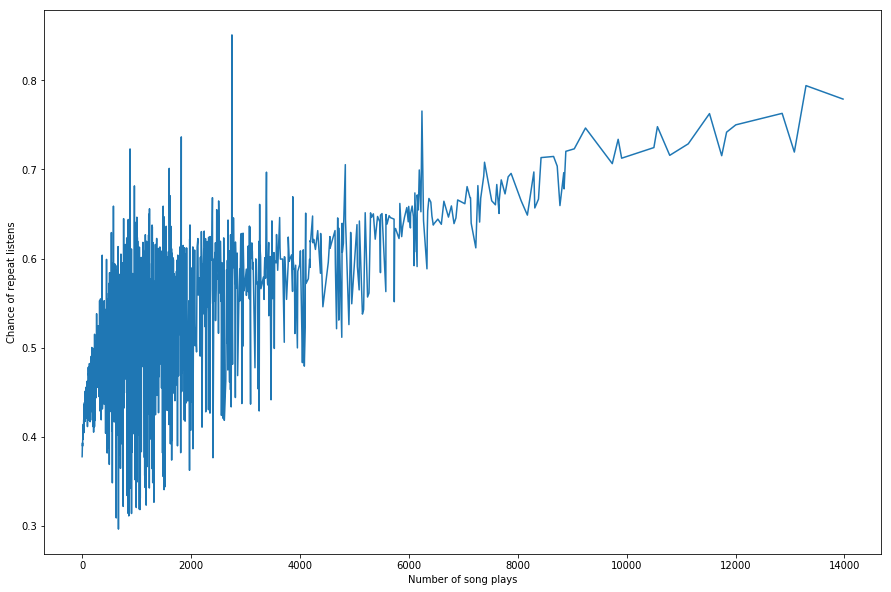

In [8]:
f,axarray = plt.subplots(1,1,figsize=(15,10))
plt.xlabel('Number of song plays')
plt.ylabel('Chance of repeat listens')
plt.plot(number_of_plays, repeat_chance)
fig1 = plt.gcf()
fig1.savefig('PlaysVsRepeatability.png', dpi=100)

In [9]:
def count_vals(x):
    if type(x) != str:
        return 1
    else:
        return 1 + x.count('|')

In [10]:
song_data['number_of_genres'] = song_data['genre_ids'].apply(count_vals)
song_data['number_of_composers'] = song_data['composer'].apply(count_vals)
song_data['number_of_lyricists'] = song_data['lyricist'].apply(count_vals)

In [11]:
song_data

,song_id,repeat_play_chance,plays,song_length,genre_ids,artist_name,composer,lyricist,language,repeat_events,number_of_genres,number_of_composers,number_of_lyricists
0,+++2AEoM0d8iZTdbnAjUm35bnGKGMXdZJSv4rrWK6JQ=,0.000000,1,223921,921,รวมศิลปิน,Chackkrit Muckkanaso,Tadakorn; Narongvit Techatanawat,45.0,0.0,1,1,1
1,++/ACCkEN/+VtgrJxEqeRgRmV4y8pcarDJ9T/yRAi1E=,0.000000,2,271302,465,Variété Française,NaN,NaN,52.0,0.0,1,1,1
2,++/lJNswCU+za2pYB0cWIbGL5UzWIKtfweX20+GImZA=,0.000000,3,221413,786|947,愛的音樂盒,NaN,NaN,-1.0,0.0,2,1,1
3,++4/NK5qpbTZWln/6UmykB8cLfRTCCj8E36IKZVzBjM=,0.000000,1,142471,465,It's Christmas Time,Arranged By| Felix Mendelssohn| Gordon Jenkins...,NaN,52.0,0.0,1,4,1
4,++4Ihbdp0juQ9ldp9DysOL1WTLHIiawg7cnBTn55I/k=,0.000000,1,169970,2122,Wynton Kelly Trio,NaN,NaN,-1.0,0.0,1,1,1
5,++6SwJ+aXGV4LLqJmgEogoeEC0DxEdyus0MzD3iuveA=,0.000000,2,230086,465,北原山貓,NaN,NaN,3.0,0.0,1,1,1
6,++732ZgaVBo177j83D3Iht3ZeHUctfXg/y47RKvmc3k=,0.000000,1,228362,465,Various Artists,Jack White,Jon Athan/Ian Gari VCowtan,52.0,0.0,1,1,1
7,++7GdTgp8zbQLYOki7hVPEOHpu+KLZClsGrGiEuL2uI=,0.407407,54,267075,458,袁詠琳 (Cindy Yen),Cindy袁詠琳,賴雅妍| 黃俊郎,3.0,22.0,1,1,2
8,++8KD5dwLpXTteprbInWnhBQRkYQjmQPiFQLS3bVRLM=,0.000000,2,122416,958,Simone Kermes,Antonio Vivaldi,NaN,-1.0,0.0,1,1,1
9,++8TsjXZyHVfns0LTmZ+EdTlVY29HQSBxhzRrlSsAqk=,1.000000,1,304405,2022,Mago de Oz,NaN,NaN,52.0,1.0,1,1,1


In [12]:
n_genres_max = song_data['number_of_genres'].max()
n_composers_max = song_data['number_of_composers'].max()
n_lyricists_max = song_data['number_of_lyricists'].max()

print(n_genres_max, n_composers_max, n_lyricists_max)

8 51 23


## Relationship between number of Genre, Composer and Lyricist to the Chance of Repeating a Song

In [13]:
x_genres = list(range(1,n_genres_max+1))
x_composers = list(range(1,n_composers_max+1))
x_lyricists = list(range(1,n_lyricists_max+1))

y_genres = [song_data[song_data['number_of_genres'] == x].shape[0] for x in x_genres]
y_composers = [song_data[song_data['number_of_composers'] == x].shape[0] for x in x_composers]
y_lyricists = [song_data[song_data['number_of_lyricists'] == x].shape[0] for x in x_lyricists]

empty_ids = [i for i, y in enumerate(y_composers) if y == 0]
x_composers_fixed = [x_composers[i] for i in range(0,n_composers_max) if i not in empty_ids]
y_composers_fixed = [y_composers[i-1] for i in x_composers_fixed]

empty_ids = [i for i, y in enumerate(y_lyricists) if y == 0]
x_lyricists_fixed = [x_lyricists[i] for i in range(0,n_lyricists_max) if i not in empty_ids]
y_lyricists_fixed = [y_lyricists[i-1] for i in x_lyricists_fixed]

y_repeat_chance_g = []
y_plays_g = []

for i in range(1,n_genres_max+1):
    genres_i = song_data[song_data['number_of_genres']==i]
    count = genres_i['plays'].sum()
    y_repeat_chance_g.append(genres_i['repeat_events'].sum() / count)
    y_plays_g.append(count)
    
y_repeat_chance_c = []
y_plays_c = []

for i in x_composers_fixed:
    composers_i = song_data[song_data['number_of_composers']==i]
    count = composers_i['plays'].sum()
    y_repeat_chance_c.append(composers_i['repeat_events'].sum() / count)
    y_plays_c.append(count)
    
y_repeat_chance_l = []
y_plays_l = []

for i in x_lyricists_fixed:
    lyricists_i = song_data[song_data['number_of_lyricists']==i]
    count = lyricists_i['plays'].sum()
    y_repeat_chance_l.append(lyricists_i['repeat_events'].sum() / count)
    y_plays_l.append(count)

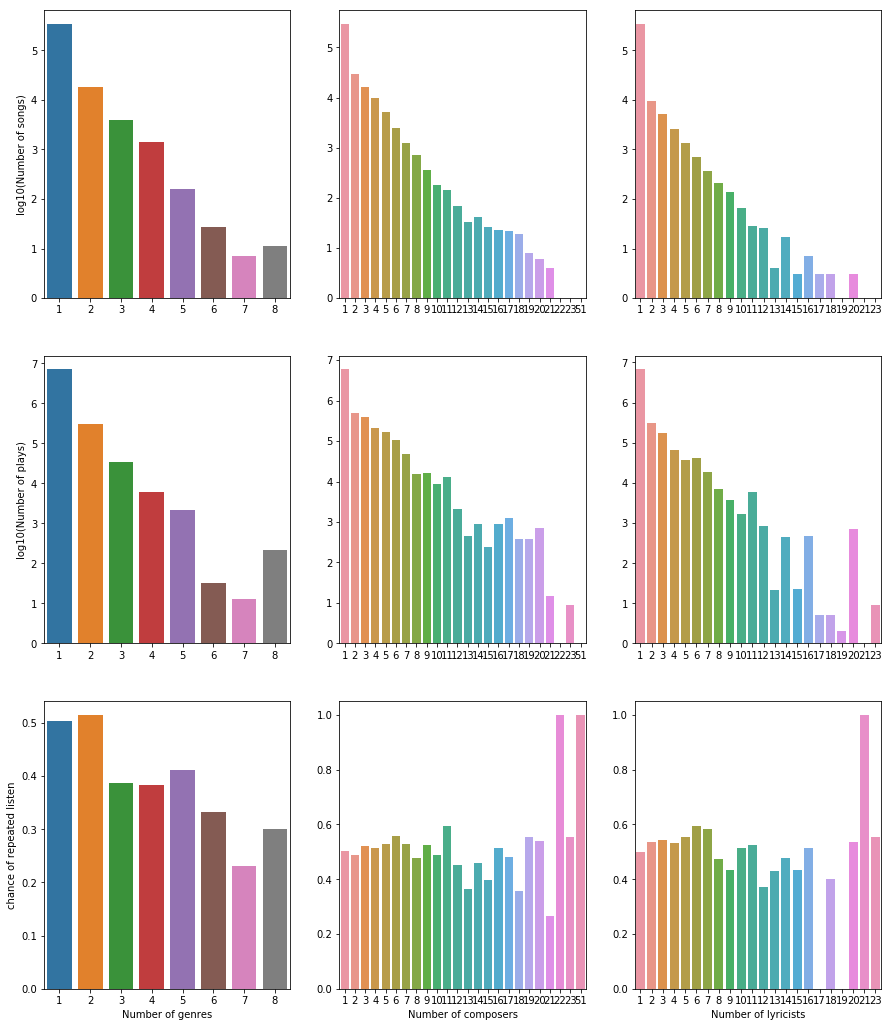

In [14]:
fig = plt.figure(figsize=(15, 18)) 

ax331 = plt.subplot(3,3,1)
sns.barplot(x=x_genres,y=np.log10(y_genres))
ax331.set_ylabel('log10(Number of songs)')
ax334 = plt.subplot(3,3,4)
sns.barplot(x=x_genres,y=np.log10(y_plays_g))
ax334.set_ylabel('log10(Number of plays)')
ax337 = plt.subplot(3,3,7)
sns.barplot(x=x_genres,y=y_repeat_chance_g)
ax337.set_xlabel('Number of genres')
ax337.set_ylabel('chance of repeated listen')

plt.subplot(3,3,2)
sns.barplot(x=x_composers_fixed,y=np.log10(y_composers_fixed))
plt.subplot(3,3,5)
sns.barplot(x=x_composers_fixed,y=np.log10(y_plays_c))
ax338 = plt.subplot(3,3,8)
sns.barplot(x=x_composers_fixed,y=y_repeat_chance_c)
ax338.set_xlabel('Number of composers')


plt.subplot(3,3,3)
sns.barplot(x=x_lyricists_fixed,y=np.log10(y_lyricists_fixed))
plt.subplot(3,3,6)
sns.barplot(x=x_lyricists_fixed,y=np.log10(y_plays_l))
ax339 = plt.subplot(3,3,9)
sns.barplot(x=x_lyricists_fixed,y=y_repeat_chance_l)
ax339.set_xlabel('Number of lyricists')
fig1 = plt.gcf()
fig1.savefig('Genre,Composer,LyricistVsRepeatability.png', dpi=100)

## Relationship between Language and Number of Songs, Number of Plays and Chance of Repeat

In [15]:
languages = song_data['language'].unique()
print(languages,languages.shape[0])

language_count = []
language_plays = []
language_repeat_chance = []

for l in languages:
    if not np.isnan(l):
        songs_with_language = song_data[song_data['language']==l]
        count = songs_with_language['plays'].sum()
        language_repeat_chance.append(songs_with_language['repeat_events'].sum() / count)
        language_count.append(songs_with_language.shape[0])
        language_plays.append(count)
    else:
        songs_with_language = song_data[pd.isnull(song_data['language'])]
        count = songs_with_language['plays'].sum()
        language_repeat_chance.append(songs_with_language['repeat_events'].sum() / count)
        language_count.append(songs_with_language.shape[0])
        language_plays.append(count)
        
languages[10] = -100

[45. 52. -1.  3. 10. 24. 31. 17. 59. 38. nan] 11


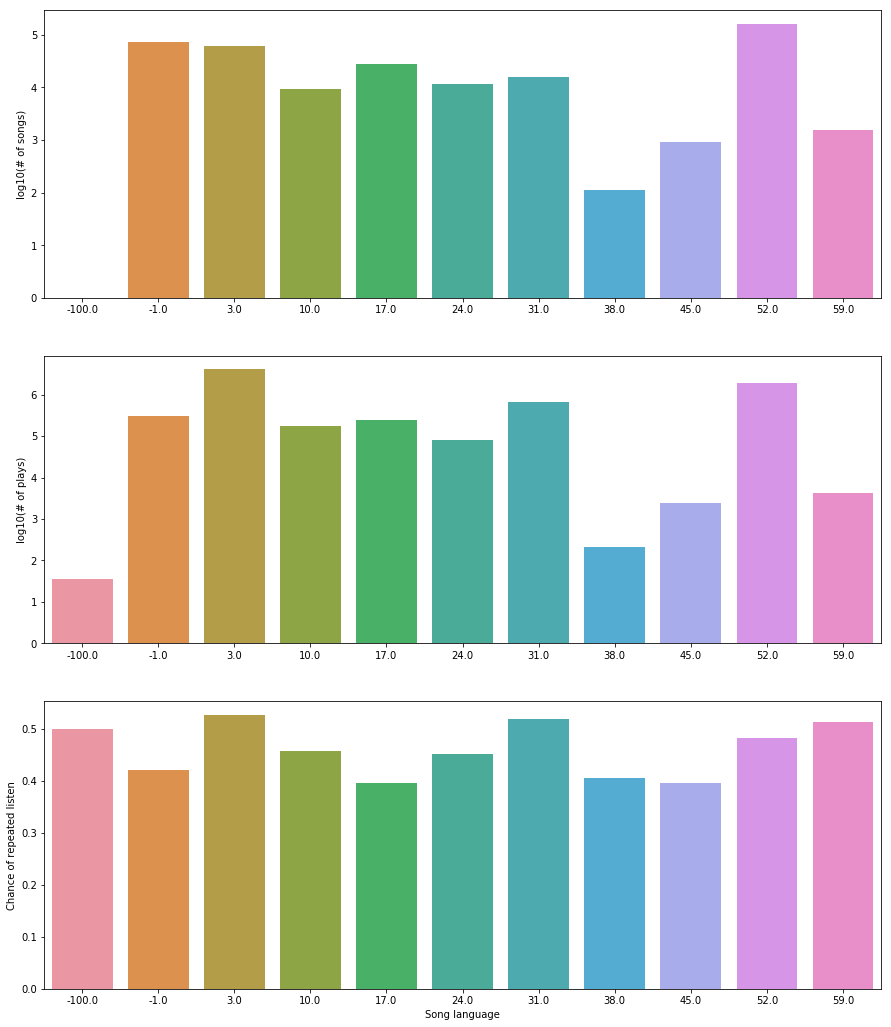

In [16]:
fig = plt.figure(figsize=(15, 18)) 

ax1 = plt.subplot(3,1,1)
sns.barplot(x=languages,y=np.log10(language_count))
ax1.set_ylabel('log10(# of songs)')
ax2 = plt.subplot(3,1,2)
sns.barplot(x=languages,y=np.log10(language_plays))
ax2.set_ylabel('log10(# of plays)')
ax3 = plt.subplot(3,1,3)
sns.barplot(x=languages,y=language_repeat_chance)
ax3.set_ylabel('Chance of repeated listen')
ax3.set_xlabel('Song language')
fig1 = plt.gcf()
fig1.savefig('Language,Songs,PlaysVsRepeatability.png', dpi=100)

## Exploring the Length of the Songs

In [17]:
min_song_length_sec = song_data['song_length'].min() / 1000  # the data is in msec
max_song_length_sec = song_data['song_length'].max() / 1000
print(min_song_length_sec, max_song_length_sec)

1.393 10851.706


In [18]:
#min_length_song = song_data.iloc[song_data['song_length'].idxmin()]
#max_length_song = song_data.iloc[song_data['song_length'].idxmax()]
#print(min_length_song[['artist_name', 'composer', 'lyricist', 'number_of_composers','number_of_lyricists', 'song_length', 'repeat_play_chance']], '\n')
#print(max_length_song[['artist_name', 'composer', 'lyricist', 'number_of_composers','number_of_lyricists', 'song_length', 'repeat_play_chance']])

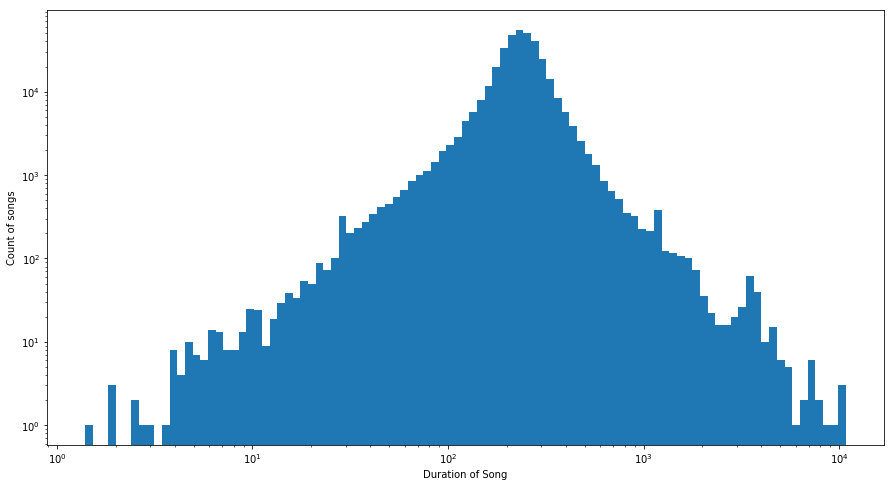

In [19]:
plt.figure(figsize=(15,8))
length_bins = np.logspace(np.log10(min_song_length_sec),np.log10(max_song_length_sec+1),100)
sns.distplot(song_data['song_length']/1000, bins=length_bins, kde=False,hist_kws={"alpha": 1})
plt.xlabel('Duration of Song')
plt.ylabel('Count of songs')
plt.yscale('log')
plt.xscale('log')
fig1 = plt.gcf()
fig1.savefig('CountVsDuration.png', dpi=100)

## Relationship between Length of the Songs and Repeatability

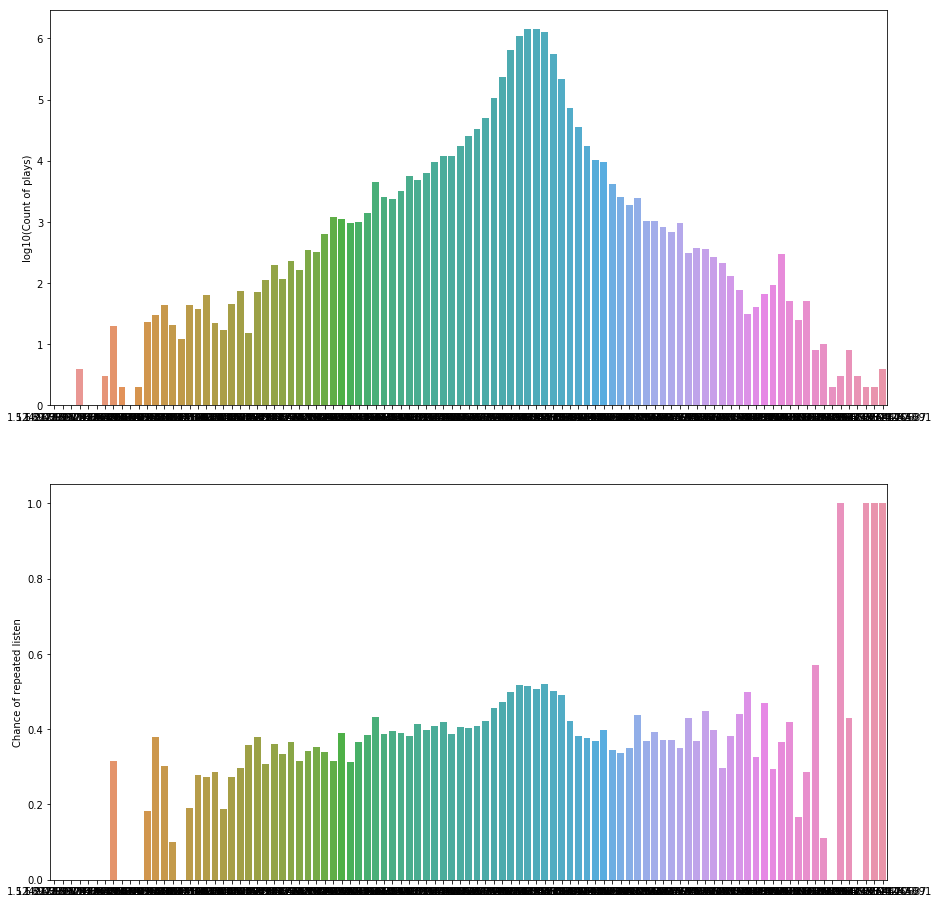

In [20]:
time_labels = list(range(length_bins.shape[0]-1))
song_data['time_cuts'] = pd.cut(song_data['song_length']/1000, bins=length_bins, labels=time_labels)

y_repeat_chance_tc = []
y_plays_tc = []
y_rel_plays = []
for i in time_labels:
    timecut_i = song_data[song_data['time_cuts']==i]
    count = timecut_i['plays'].sum()
    y_plays_tc.append(count)
    if count != 0:
        y_repeat_chance_tc.append(timecut_i['repeat_events'].sum() / count)
        y_rel_plays.append(count / timecut_i.shape[0])
    else:
        y_repeat_chance_tc.append(0)
        y_rel_plays.append(0)
    
fig = plt.figure(figsize=(15, 16)) 

y_plays_tc = [yptc + 1 for yptc in y_plays_tc]

ax211 = plt.subplot(2,1,1)
sns.barplot(x=length_bins[time_labels],y=np.log10(y_plays_tc))
ax211.set_ylabel('log10(Count of plays)')

ax212 = plt.subplot(2,1,2)
sns.barplot(x=length_bins[time_labels],y=y_repeat_chance_tc)
ax212.set_ylabel('Chance of repeated listen')
fig1 = plt.gcf()
fig1.savefig('CountVsRepeatability.png', dpi=100)

## Relationship between Number of Tracks and Number of Plays

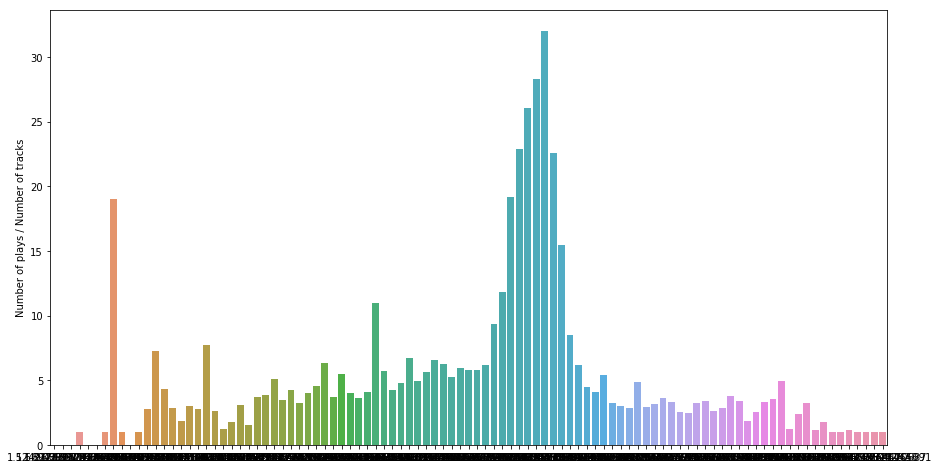

In [21]:
fig = plt.figure(figsize=(15, 8)) 

ax111 = plt.subplot(1,1,1)
sns.barplot(x=length_bins[time_labels],y=y_rel_plays)
ax111.set_ylabel('Number of plays / Number of tracks')
fig1 = plt.gcf()
fig1.savefig('CountVsPlays.png', dpi=100)

## Relationship Between Number of Artists and Number of Plays

In [22]:
artist_groupby = song_data[['artist_name', 'plays']].groupby(['artist_name'])
artist_plays = artist_groupby['plays'].agg(['sum'])
artist_plays.reset_index(inplace=True)

min_plays = artist_plays['sum'].min()
max_plays = artist_plays['sum'].max()
print(min_plays, max_plays)

1 303616


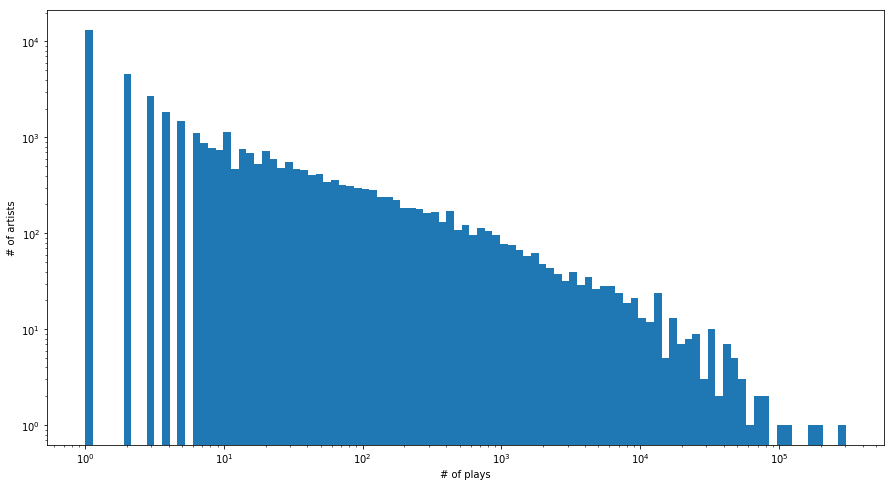

In [23]:
plt.figure(figsize=(15,8))
play_bins = np.logspace(np.log10(min_plays),np.log10(max_plays+1),100)
# track_bins = np.linspace(1,max_tracks+1,100)
sns.distplot(artist_plays['sum'], bins=play_bins, kde=False,
             hist_kws={"alpha": 1})
plt.xlabel('# of plays')
plt.ylabel('# of artists')
plt.yscale('log')
plt.xscale('log')
fig1 = plt.gcf()
fig1.savefig('ArtistsVsPlays.png', dpi=100)

## Relationship Between Number of Artists and Chance of Repeatability

In [24]:
artist_replgroupby = song_data[['artist_name', 'plays', 'repeat_events']].groupby(['artist_name'])
artist_replgroupby = artist_replgroupby['plays', 'repeat_events'].agg(['sum', 'count'])
artist_replgroupby.reset_index(inplace=True)
artist_replgroupby.columns = list(map(''.join, artist_replgroupby.columns.values))
artist_replgroupby.drop(['repeat_eventscount'], axis=1, inplace=True)
artist_replgroupby.columns = ['artist', 'plays', 'tracks', 'repeat_events']
artist_replgroupby['repeat_play_chance'] = artist_replgroupby['repeat_events'] / artist_replgroupby['plays']

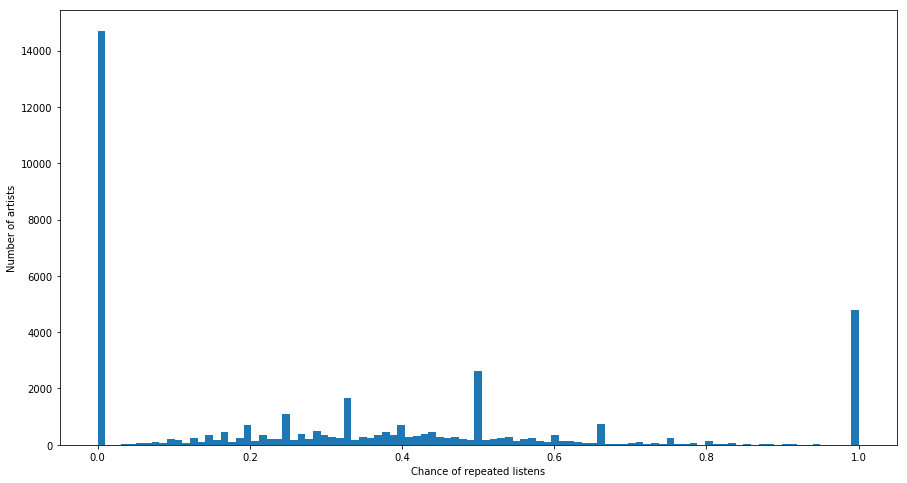

In [25]:
plt.figure(figsize=(15,8))
chance_bins = np.linspace(0,1,100)
sns.distplot(artist_replgroupby['repeat_play_chance'], bins=chance_bins, kde=False,hist_kws={"alpha": 1})
plt.xlabel('Chance of repeated listens')
plt.ylabel('Number of artists')
#plt.yscale('log')
#plt.xscale('log')
fig1 = plt.gcf()
fig1.savefig('ArtistsVsRepeatability.png', dpi=100)

## Relationship Between Number of Plays and Chance of Repeatibility

In [26]:
artist_replgroupby['plays'].max()

303616

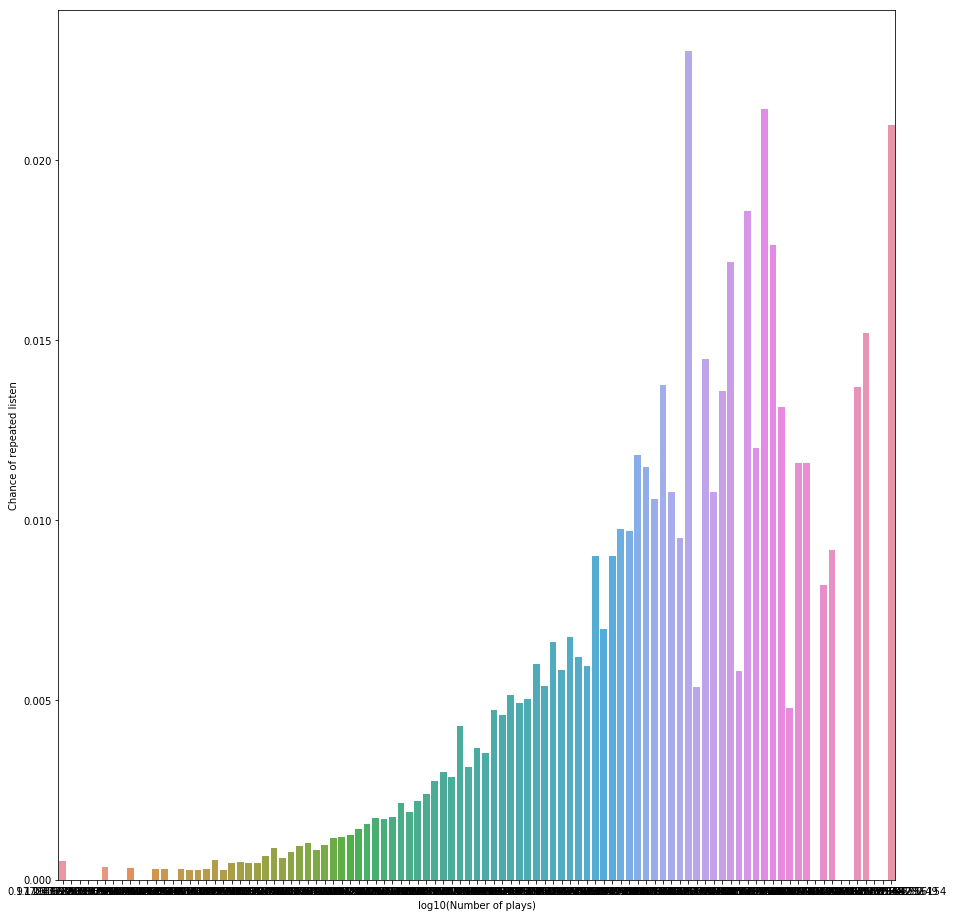

In [27]:
play_bins = np.logspace(-0.01, np.log10(artist_replgroupby['plays'].max()), 100)
play_labels = list(range(play_bins.shape[0]-1))
artist_replgroupby['play_cuts'] = pd.cut(artist_replgroupby['plays'],
                                         bins=play_bins, labels=play_labels)

y_repeat_chance_p = []
y_plays_p = []
for i in play_labels:
    playcut_i = artist_replgroupby[artist_replgroupby['play_cuts']==i]
    count = artist_replgroupby['plays'].sum()
    y_plays_p.append(count)
    if count != 0:
        y_repeat_chance_p.append(playcut_i['repeat_events'].sum() / count)
    else:
        y_repeat_chance_p.append(0)
    
fig = plt.figure(figsize=(15, 16)) 

ax111 = plt.subplot(1,1,1)
sns.barplot(x=play_bins[play_labels],y=y_repeat_chance_p)
ax111.set_xlabel('log10(Number of plays)')
ax111.set_ylabel('Chance of repeated listen')
fig1 = plt.gcf()
fig1.savefig('RepeatabilityVsPlays.png', dpi=100)

## Relationship Between Number of Tracks and Chance of Repeatability

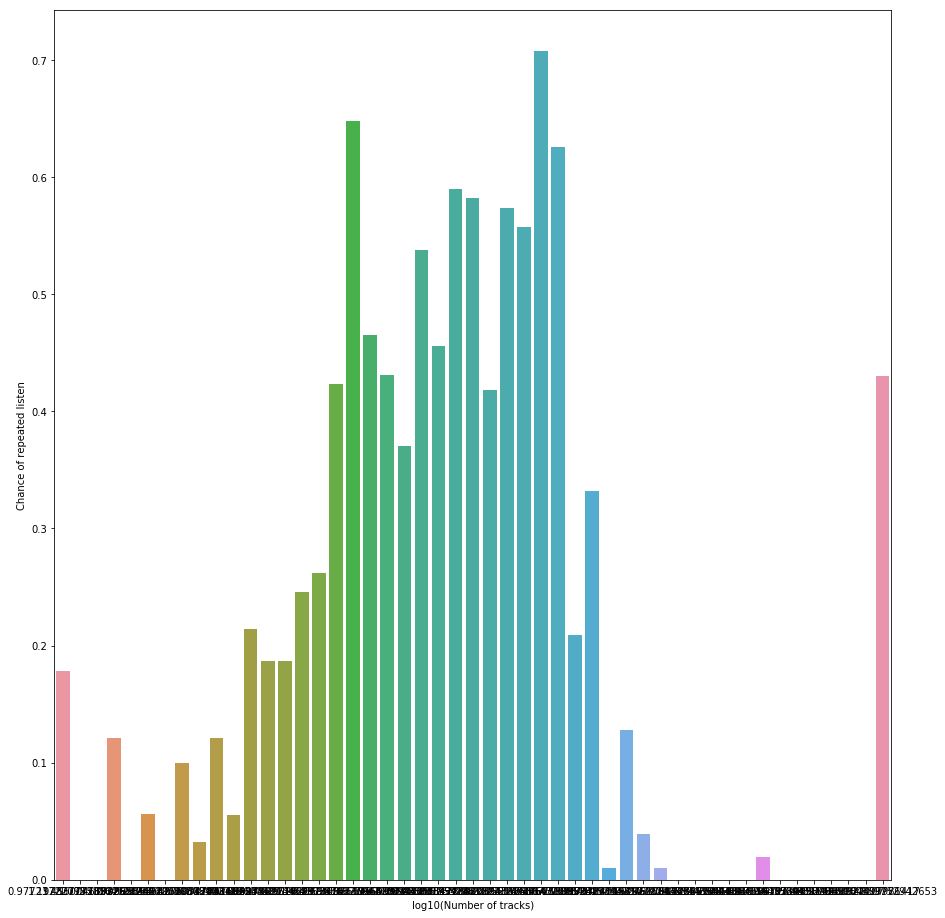

In [28]:
track_bins = np.logspace(-0.01, np.log10(artist_replgroupby['tracks'].max()), 50)
track_labels = list(range(track_bins.shape[0]-1))
artist_replgroupby['track_cuts'] = pd.cut(artist_replgroupby['tracks'],bins=track_bins, labels=track_labels)

y_repeat_chance_t = []
y_tracks_t = []
for i in track_labels:
    trackcut_i = artist_replgroupby[artist_replgroupby['track_cuts']==i]
    count = artist_replgroupby['tracks'].sum()
    y_tracks_t.append(count)
    if count != 0:
        y_repeat_chance_t.append(trackcut_i['repeat_events'].sum() / count)
    else:
        y_repeat_chance_t.append(0)
    
fig = plt.figure(figsize=(15, 16)) 

ax111 = plt.subplot(1,1,1)
sns.barplot(x=track_bins[track_labels],y=y_repeat_chance_t)
ax111.set_xlabel('log10(Number of tracks)')
ax111.set_ylabel('Chance of repeated listen')
fig1 = plt.gcf()
fig1.savefig('RepeatabilityVsPlays.png', dpi=100)

## Relationship Between Number of Languages and Number of Artists

In [29]:
artist_langgroupby = song_data[['artist_name',  'language']].groupby(['artist_name'])
artist_langgroupby = artist_langgroupby.agg({"language": pd.Series.nunique})
artist_langgroupby.reset_index(inplace=True)
artist_langgroupby.columns = list(map(''.join, artist_langgroupby.columns.values))
artist_langgroupby.columns = ['artist', 'language']

artist_repl_lang = artist_replgroupby.merge(artist_langgroupby, on='artist')

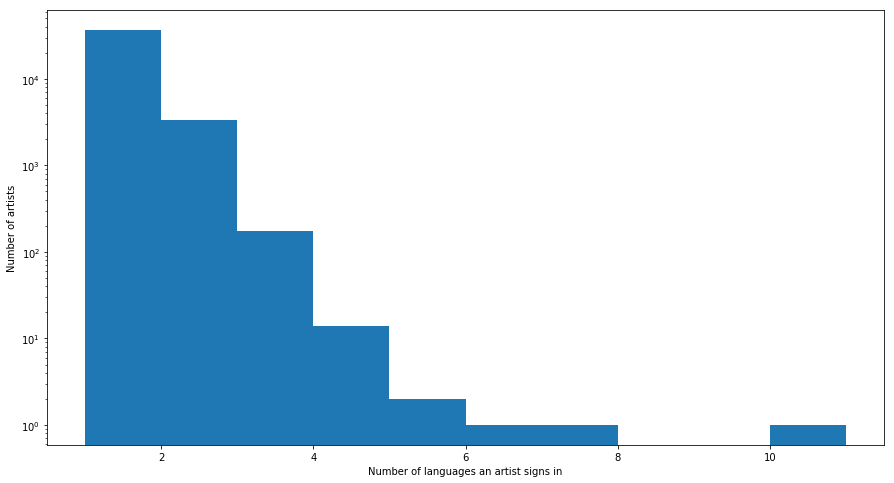

In [30]:
plt.figure(figsize=(15,8))
chance_bins = np.linspace(1,artist_repl_lang['language'].max()+1,11)
sns.distplot(artist_repl_lang['language'], bins=chance_bins, kde=False,hist_kws={"alpha": 1})
plt.xlabel('Number of languages an artist signs in')
plt.ylabel('Number of artists')
plt.yscale('log')
fig1 = plt.gcf()
fig1.savefig('ArtistsVsLanguages.png', dpi=100)

## Relationship Between Number of Languages and Number of Tracks, Number of Plays and Change of Repeatability

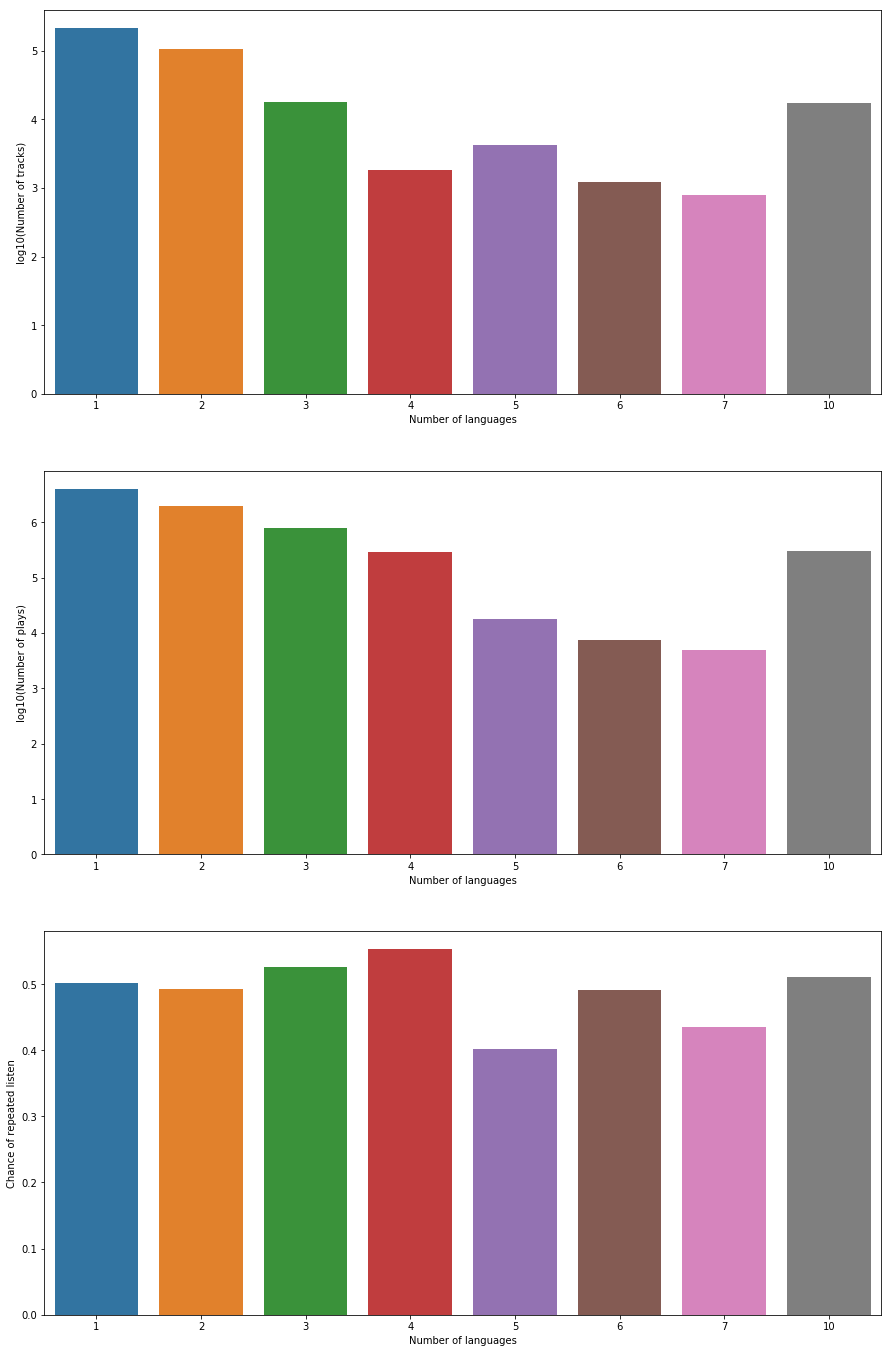

In [31]:
y_repeat_chance_l = []
y_plays_l = []
y_tracks_l = []

max_l = int(artist_repl_lang['language'].max())
l_list = []

for i in range(1,max_l+1):
    arlang = artist_repl_lang[artist_repl_lang['language']==i]
    count = arlang['plays'].sum()
    if count != 0:
        y_tracks_l.append(arlang['tracks'].sum())
        y_plays_l.append(count)
        l_list.append(i)
        y_repeat_chance_l.append(arlang['repeat_events'].sum() / count)
    
fig = plt.figure(figsize=(15, 24)) 

ax311 = plt.subplot(3,1,1)
sns.barplot(x=l_list,y=np.log10(y_tracks_l))
ax311.set_xlabel('Number of languages')
ax311.set_ylabel('log10(Number of tracks)')

ax312 = plt.subplot(3,1,2)
sns.barplot(x=l_list,y=np.log10(y_plays_l))
ax312.set_xlabel('Number of languages')
ax312.set_ylabel('log10(Number of plays)')

ax313 = plt.subplot(3,1,3)
sns.barplot(x=l_list,y=y_repeat_chance_l)
ax313.set_xlabel('Number of languages')
ax313.set_ylabel('Chance of repeated listen')
fig1 = plt.gcf()
fig1.savefig('Tracks,Plays,RepeatabilityVsLanguage.png', dpi=100)

## Exploring the Genre Information in the DataSet

In [32]:
def split_genres(x, n):
    # n is the number of the genre
    if type(x) != str:
        if n == 1:
            if not np.isnan(x):
                return int(x)
            else:
                return x
    else:
        if x.count('|') >= n-1:
            return int(x.split('|')[n-1])

In [33]:
max_genres = song_data['number_of_genres'].max()

for i in range(1,max_genres+1):
    sp_g = lambda x: split_genres(x, i)
    song_data['genre_'+str(i)] = song_data['genre_ids'].apply(sp_g)
    
n_genres = set()

for i in range(1,max_genres+1):
    n_genres.update(song_data['genre_'+str(i)][song_data['genre_'+str(i)].notnull()].unique().tolist())

In [34]:
len(n_genres), song_data['genre_ids'].isnull().sum()

(166, 7233)

In [35]:
genres_plays = [0] * (len(n_genres) + 1)
genres_tracks = [0] * (len(n_genres) + 1)
genres_replays = [0] * (len(n_genres) + 1)

for i in range(1,max_genres+1):
    notnull_data = song_data[song_data['genre_'+str(i)].notnull()]
    for j, k in enumerate(n_genres):
        jk_sdata = notnull_data[notnull_data['genre_'+str(i)] == k]
        genres_plays[j] += jk_sdata['plays'].sum()
        genres_tracks[j] += jk_sdata['plays'].shape[0]
        genres_replays[j] += jk_sdata['repeat_events'].sum()

null_genre_data = song_data[song_data['genre_1'].isnull()]
genres_plays[len(n_genres)] = null_genre_data['plays'].sum()
genres_tracks[len(n_genres)] = null_genre_data['plays'].shape[0]
genres_replays[len(n_genres)] = null_genre_data['repeat_events'].sum()

genres_rel_plays = [x/y for x, y in zip(genres_plays, genres_tracks)]
genres_repl_chance = [x/y for x, y in zip(genres_replays, genres_plays)]

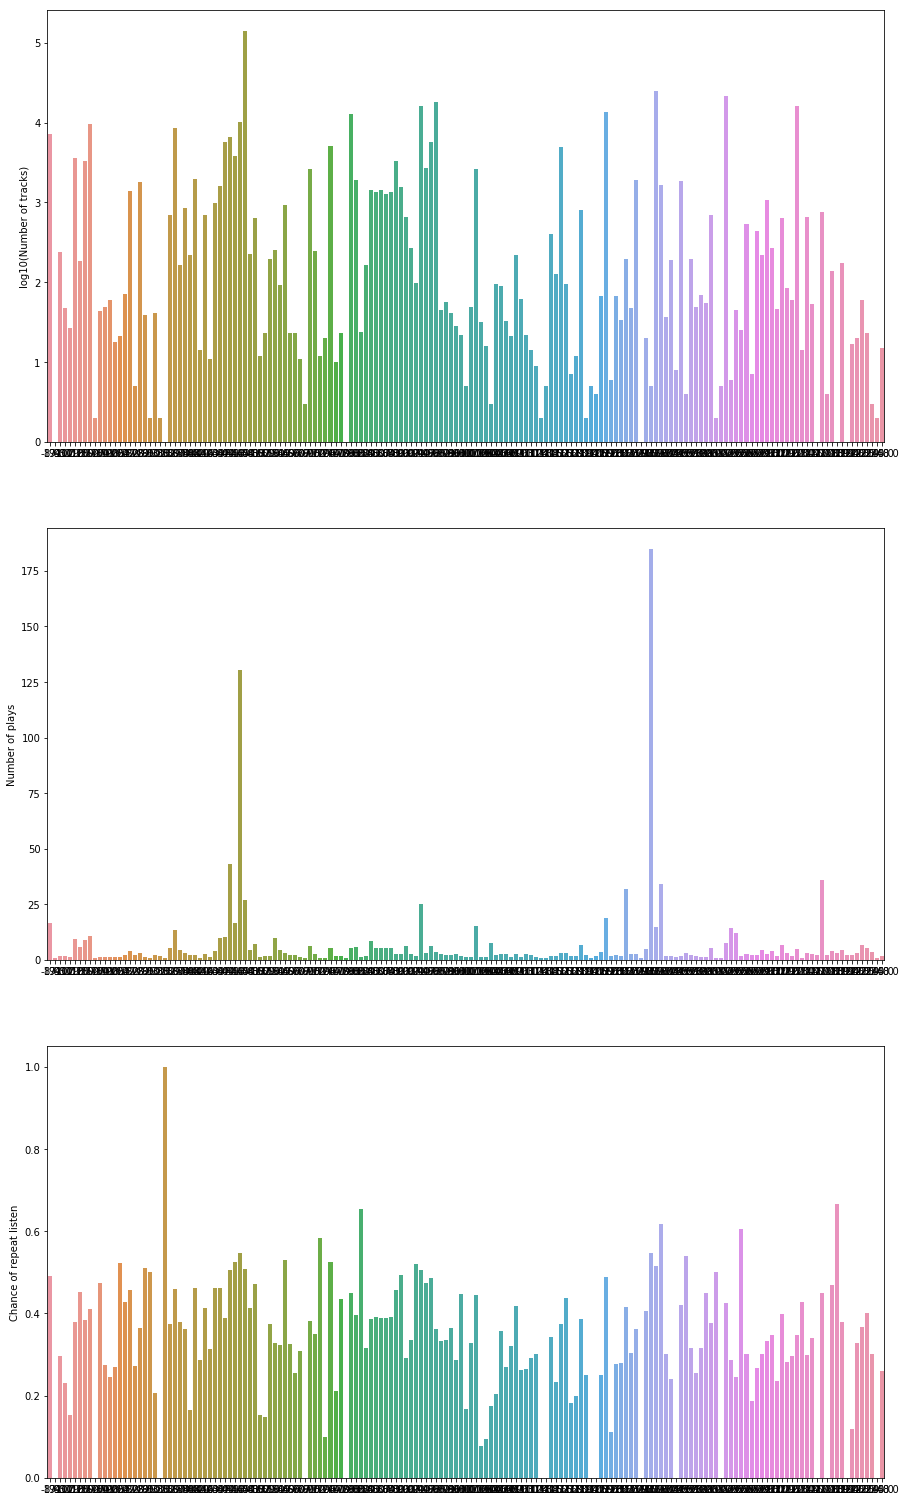

In [36]:
n_g_l = [x for x in n_genres]
n_g_l.append(-1)

fig = plt.figure(figsize=(15, 27)) 

ax411 = plt.subplot(3,1,1)
sns.barplot(x=n_g_l,y=np.log10(genres_tracks))
ax411.set_ylabel('log10(Number of tracks)')


ax413 = plt.subplot(3,1,2)
sns.barplot(x=n_g_l,y=genres_rel_plays)
ax413.set_ylabel('Number of plays')

ax414 = plt.subplot(3,1,3)
sns.barplot(x=n_g_l,y=genres_repl_chance)
ax414.set_ylabel('Chance of repeat listen')
fig1 = plt.gcf()
fig1.savefig('Track,Plays,RepeatabilityVsGenre.png', dpi=100)

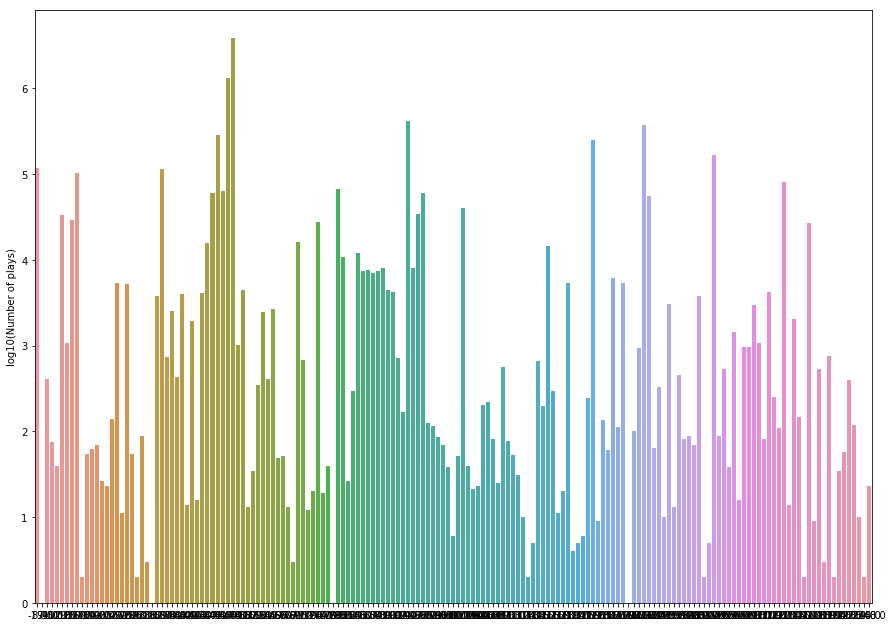

In [37]:
fig = plt.figure(figsize=(15, 24))

ax412 = plt.subplot(2,1,1)
sns.barplot(x=n_g_l,y=np.log10(genres_plays))
ax412.set_ylabel('log10(Number of plays)')
fig1 = plt.gcf()
fig1.savefig('PlaysVsGenre.png', dpi=100)

## Comparing Genre Information in Training and Testing Datasets

In [38]:
test_merged['number_of_genres'] = test_merged['genre_ids'].apply(count_vals)
number_of_genres_test = test_merged['number_of_genres'].max()
print(number_of_genres_test)


for i in range(1,number_of_genres_test+1):
    sp_g = lambda x: split_genres(x, i)
    test_merged['genre_'+str(i)] = test_merged['genre_ids'].apply(sp_g)
    
n_genres_test = set()

for i in range(1,max_genres+1):
    n_genres_test.update(test_merged['genre_'+str(i)][test_merged['genre_'+str(i)].notnull()].unique().tolist())
print(len(n_genres_test))

8
162


In [39]:
c = 0
in_test_not_in_train = []
for g in n_genres_test:
    if g not in n_genres:
        c += 1
        in_test_not_in_train.append(g)
print(c, in_test_not_in_train)

6 [1061.0, 2045.0, 1089.0, 166.0, 765.0, 303.0]


In [40]:
song_genres_test = []
song_genres_artist = []
for g in in_test_not_in_train:
    tmp = 0
    for i in range(1,number_of_genres_test+1):
        tmp_filtered = test_merged[test_merged['genre_'+str(i)]==g]
        tmp += tmp_filtered.shape[0]
        for stt_artist in tmp_filtered['artist_name']:
            song_genres_artist.append(stt_artist)
    song_genres_test.append(tmp)
print(song_genres_test, sum(song_genres_test))
print(set(song_genres_artist))

[2, 2, 1, 10, 2, 1] 18
{'Paul Simon', 'goldenage (黄金時代)', '虐之詩', 'Fabrice Millischer', 'Lea Salonga', 'Lovi', 'Sebastiano Serafini'}
